### Time Series - Forecasting the number of Air Passengers

I worked on this as an extension of an MIT IDSS Data Science course project

In [1]:
# To ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries for data manipulation
import pandas as pd
import numpy as np

#Importing libraries for visualization
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

#Importing library for date manipulation
from datetime import datetime

Reading the dataset

In [3]:
#Reading the dataset
df = pd.read_excel('AirPassenger.xlsx')
df.head()

,Year-Month,# Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
#Check the shape of the dataset
df.shape

(144, 2)

In [5]:
#Setting the date as the index

df['Year-Month'] = pd.to_datetime(df['Year-Month'], infer_datetime_format=True)
df = df.set_index(['Year-Month'])
df.head(12)


,# Passengers
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


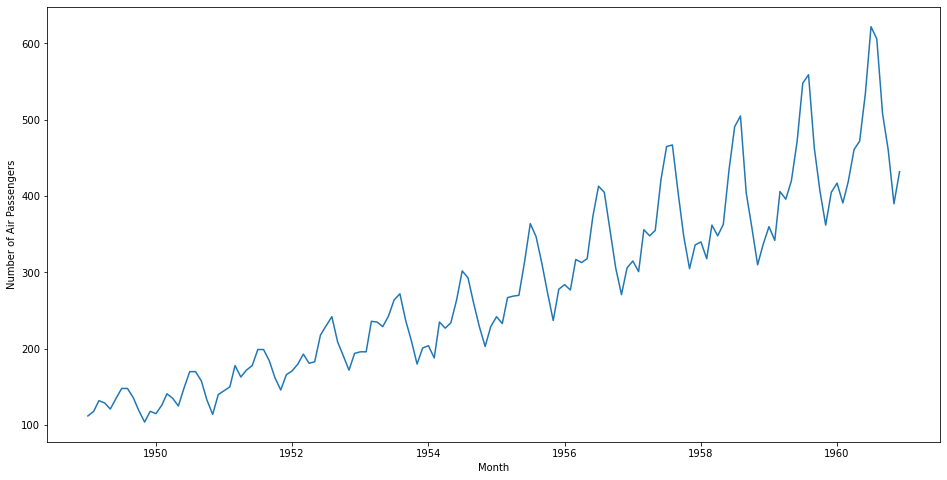

In [6]:
# Visualizing the time series dataset
plt.figure(figsize=(16,8))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(df)

The series has a upward trend with seasonality.

In [7]:
# Calculating the rolling mean and standard deviation for a window of 12 observations
rolmean=df.rolling(window=12).mean()    
rolstd=df.rolling(window=12).std()     
print(rolmean.head(15))
print('**************************************')
print('**************************************')
print(rolstd.head(15))


            # Passengers
Year-Month              
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01           NaN
1949-08-01           NaN
1949-09-01           NaN
1949-10-01           NaN
1949-11-01           NaN
1949-12-01    126.666667
1950-01-01    126.916667
1950-02-01    127.583333
1950-03-01    128.333333
**************************************
**************************************
            # Passengers
Year-Month              
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01           NaN
1949-08-01           NaN
1949-09-01           NaN
1949-10-01           NaN
1949-11-01           NaN
1949-12-01     13.720147
1950-01-01     13.453342
1950-02-01     13.166475
1950-03-01     13.686977


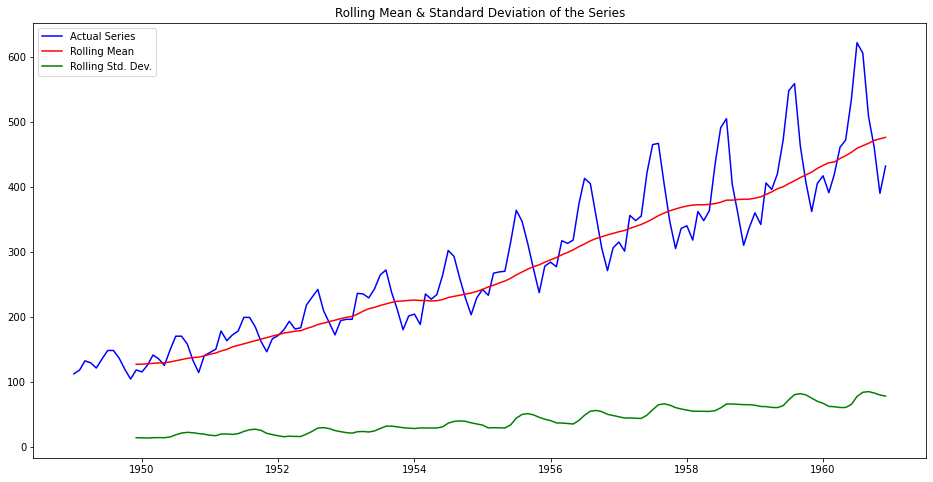

In [8]:
#Visualizing the rolling mean and standard deviation

plt.figure(figsize=(16,8))
actual = plt.plot(df, color='blue', label='Actual Series')     
rollingmean = plt.plot(rolmean, color='red', label='Rolling Mean')    
rollingstd = plt.plot(rolstd, color='green', label='Rolling Std. Dev.')  
plt.title('Rolling Mean & Standard Deviation of the Series')
plt.legend()
plt.show()

The rolling mean shows that there is an increasing trend in the data over the years. The rolling standard deviation does not change much over the years.

Testing the stationarity of the series using Augmented Dickey-Fuller Test

The hypotheses for ADF test are defined as 
-        Null hypothesis         - Time Series is non-stationary
-        Alternative hypothesis  - Time Series is stationary

In [9]:
#Define a function to use adfuller test
def adfuller(df):
  #Importing adfuller using statsmodels
  from statsmodels.tsa.stattools import adfuller
  print('Dickey-Fuller Test: ')
  adftest = adfuller(df['# Passengers'])
  adfoutput = pd.Series(adftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Observations'])
  for key,value in adftest[4].items():
    adfoutput['Critical Value (%s)'%key] = value
  print(adfoutput)
adfuller(df)

Dickey-Fuller Test: 
Test Statistic            0.815369
p-value                   0.991880
Lags Used                13.000000
No. of Observations     130.000000
Critical Value (1%)      -3.481682
Critical Value (5%)      -2.884042
Critical Value (10%)     -2.578770
dtype: float64


- From the above test, we see that the p-value = 0.991880 i.e. > 0.1 (For 90% confidence intervals) therefore, we fail to reject the null hypothesis.
- Hence, we can confirm that the series is non-stationary

Transforming the series to a stationary series: The series is transformed by first taking the log.

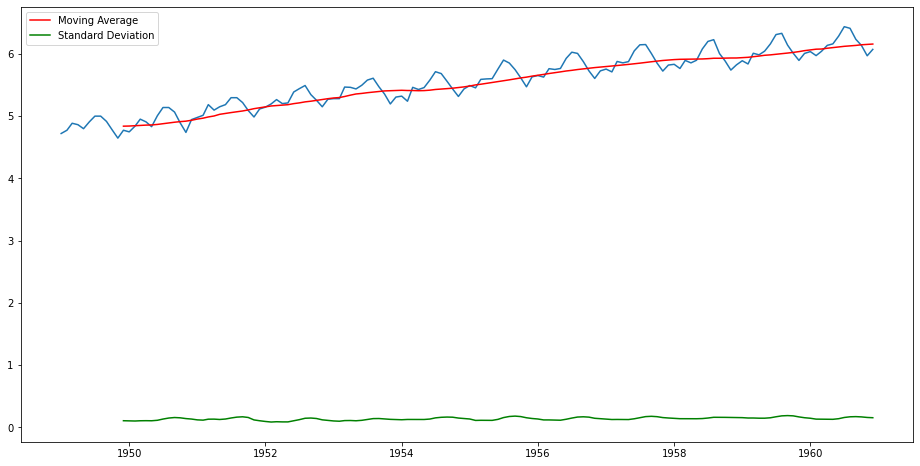

In [10]:
# Visualizing the rolling mean and standard deviation after using log transformation
plt.figure(figsize=(16,8))
df_log = np.log(df)
MAvg = df_log.rolling(window=12).mean()  
MStd = df_log.rolling(window=12).std()   
plt.plot(df_log)                            
plt.plot(MAvg, color='r', label = 'Moving Average')   
plt.plot(MStd, color='g', label = 'Standard Deviation')   
plt.legend()
plt.show()

In [11]:
df_log

,# Passengers
Year-Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


In [12]:
MAvg.head(12)

,# Passengers
Year-Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


The log of the series shows an increasing trend. The rolling mean appears to show an approximately linear increase over the years. The rolling standard deviation does not change much over the years.

Using the differencing method over the series to remove the trend:

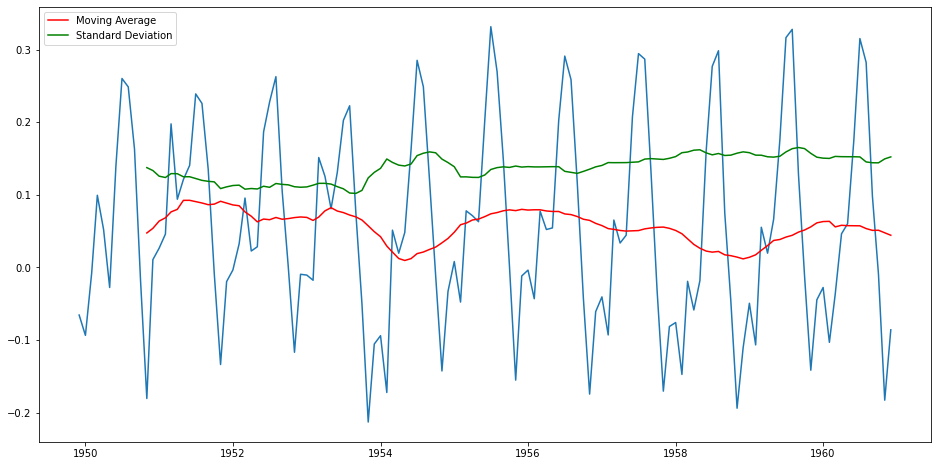

In [13]:
# Visualizing the rolling mean and standard deviation after using log transform and differencing 
plt.figure(figsize=(16,8))
df_log_diff = df_log - MAvg
MAvg_diff = df_log_diff.rolling(window=12).mean()  
MStd_diff = df_log_diff.rolling(window=12).std()    
plt.plot(df_log_diff)                                    
plt.plot(MAvg_diff, color='r', label = 'Moving Average') 
plt.plot(MStd_diff, color='g', label = 'Standard Deviation')
plt.legend()
plt.show()

#Dropping the 1 null value that we get after applying differencing method
df_log_diff = df_log_diff.dropna()

The transformed series appears to be stationary. The rolling mean and standard deviation do not change much over the years.

In [14]:
#Using the adfuller function for df_log_diff
adfuller(df_log_diff)

Dickey-Fuller Test: 
Test Statistic           -3.162908
p-value                   0.022235
Lags Used                13.000000
No. of Observations     119.000000
Critical Value (1%)      -3.486535
Critical Value (5%)      -2.886151
Critical Value (10%)     -2.579896
dtype: float64


The p-value < 0.05, so we can reject the null hypothesis ($H_0$: the transformed time series is not stationary) with 95% confidence limits. The transformed series can be considered stationary.

Decomposing the time series components into Trend, Seasonality and Residual:

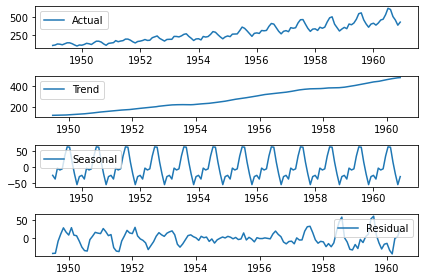

In [15]:
#Importing the seasonal_decompose to decompose the time series
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(df)      #Using the original series to decompose

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.subplot(411)
plt.plot(df, label='Actual')
plt.legend()
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend()
plt.tight_layout()

There is seasonality in the data. The residual between 1958 and 1960 is almost of the same magnitude and same period as the seasonality, showing that the seasonality became stronger over the years. This is seen in the plot of seasonality + residual below, which shows an increasing amplitude of oscillations over time.

Text(0.5, 0, 'Year')

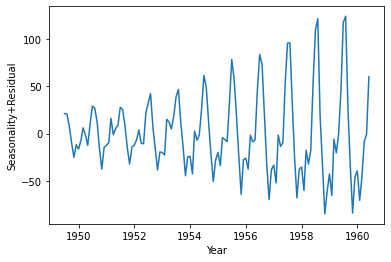

In [16]:
plt.plot(seasonal+residual)
plt.ylabel('Seasonality+Residual')
plt.xlabel('Year')

Predictions and forecasting based on the transformed series:

In [17]:
# MAvg = mean of log series over rolling window of 12 months.
# First 11 values are NaN
MAvg = MAvg.dropna()

In [18]:
# Fit linear model to MAvg
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
X = np.asarray(pd.to_datetime(MAvg.index).map(datetime.toordinal)).reshape(-1,1)
y = MAvg['# Passengers']
lr.fit(X, y)

LinearRegression()

In [19]:
# This linear model of MAvg will be used to convert log diff time series back to original time series
lr.coef_, lr.intercept_

(array([0.00033254]), -231.8329815811943)

In [20]:
# R2 score shows linear assumption is valid
# This model can be used for forecasting for a short time but not for a long time frame into the future 
# since the linear assumption may not hold for long into the future
ypred = lr.predict(X)
r2_score(y, ypred)

0.9880442863942152

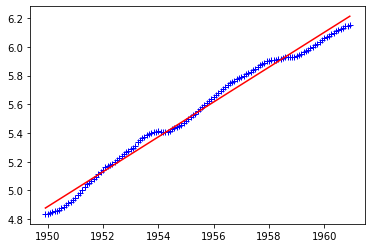

In [21]:
# Plot of moving average and linear fit
plt.plot(MAvg.index, y, '+b')
plt.plot(MAvg.index, ypred, '-r')

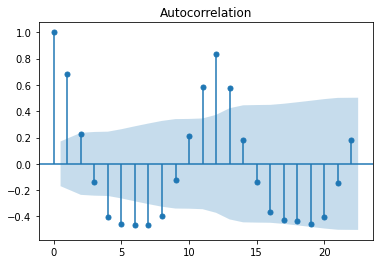

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_log_diff)
plt.show()

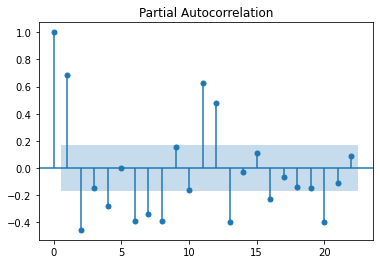

In [23]:
plot_pacf(df_log_diff)
plt.show()

C:\Users\Aruna\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


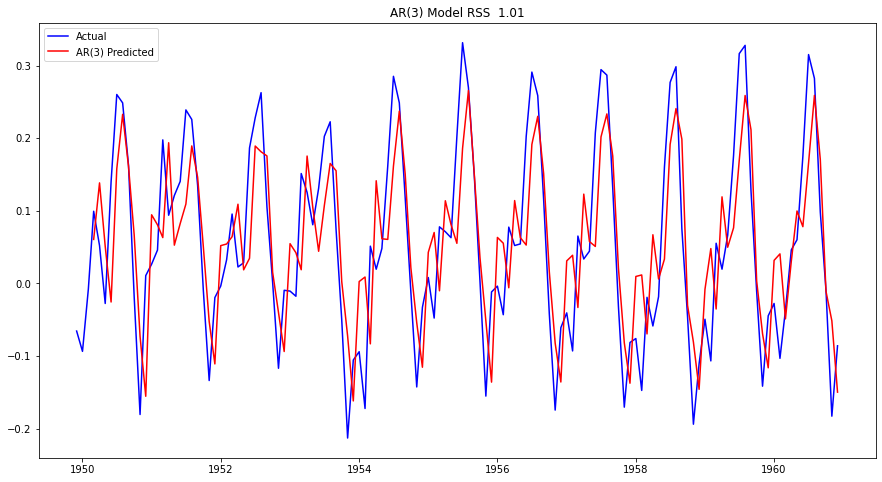

In [24]:
# p=3, q=2. Now trying various models to test for best fit.

from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA

# AR model with p=3

modar = AutoReg(df_log_diff, lags=3)
modar_res = modar.fit()
modar_pred = modar_res.predict(start=0, end=len(df_log_diff)-1)
plt.figure(figsize=(15,8))
plt.plot(df_log_diff, label='Actual', color='b')
plt.plot(modar_pred, label='AR(3) Predicted', color='r')
plt.legend()
modar_pred = modar_pred.fillna(0)
plt.title('AR(3) Model RSS  {:.2f}'.format(sum((modar_pred-df_log_diff['# Passengers'])**2)))
plt.show()

C:\Users\Aruna\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


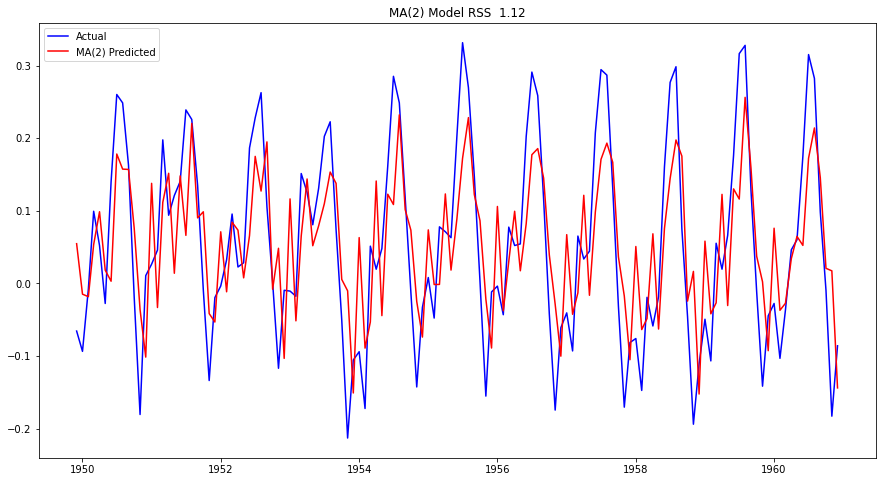

In [25]:
# MA model with q=2

modma = ARMA(df_log_diff, (0,2))
modma_res = modma.fit()
plt.figure(figsize=(15,8))
plt.plot(df_log_diff, label='Actual', color='b')
plt.plot(modma_res.fittedvalues, label='MA(2) Predicted', color='r')
plt.legend()
plt.title('MA(2) Model RSS  {:.2f}'.format(sum((modma_res.fittedvalues-df_log_diff['# Passengers'])**2)))
plt.show()

C:\Users\Aruna\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


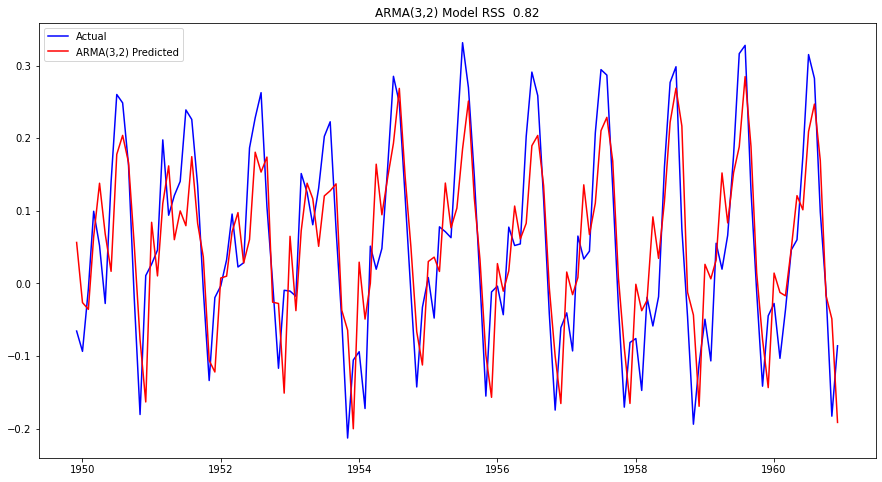

In [26]:
# ARMA model with p=3, q=2

modarma = ARMA(df_log_diff, (3,2))
modarma_res = modarma.fit()
plt.figure(figsize=(15,8))
plt.plot(df_log_diff, label='Actual', color='b')
plt.plot(modarma_res.fittedvalues, label='ARMA(3,2) Predicted', color='r')
plt.legend()
plt.title('ARMA(3,2) Model RSS  {:.2f}'.format(sum((modarma_res.fittedvalues-df_log_diff['# Passengers'])**2)))
plt.show()


In [27]:
modarma_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           # Passengers   No. Observations:                  133
Model:                     ARMA(3, 2)   Log Likelihood                 149.632
Method:                       css-mle   S.D. of innovations              0.078
Date:                Wed, 02 Dec 2020   AIC                           -285.265
Time:                        17:14:36   BIC                           -265.032
Sample:                    12-01-1949   HQIC                          -277.043
                         - 12-01-1960                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0565      0.005     10.691      0.000       0.046       0.067
ar.L1.# Passengers     0.7863      0.103      7.633      0.000       0.584       0.988
ar.L2.# Passengers     0.2886      0.141      2.042      0.041       0.012       0.566
ar.L3.# Passengers    -0.5308      0.095     -5.612      0.000      -0.716      -0.345
ma.L1.# Passengers     0.0980      0.077      1.279      0.201      -0.052       0.248
ma.L2.# Passengers    -0.7543      0.063    -12.043      0.000      -0.877      -0.632
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.4245           -0.0000j            1.4245           -0.5000
AR.2            0.9841           -0.5950j            1.1500           -0.0866
AR.3            0.9841           +0.5950j            1.1500            0.0866
MA.1           -1.0883           +0.0000j            1.0883            0.5000
MA.2            1.2182           +0.0000j            1.2182            0.0000
-----------------------------------------------------------------------------
"""

C:\Users\Aruna\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


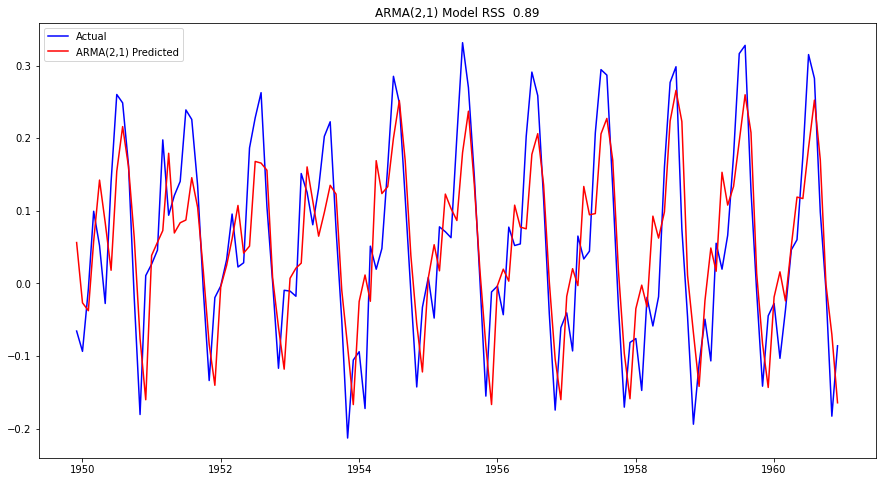

In [28]:
# ARMA model with p=2, q=1

modarma = ARMA(df_log_diff, (2,1))
modarma_res = modarma.fit()
plt.figure(figsize=(15,8))
plt.plot(df_log_diff, label='Actual', color='b')
plt.plot(modarma_res.fittedvalues, label='ARMA(2,1) Predicted', color='r')
plt.legend()
plt.title('ARMA(2,1) Model RSS  {:.2f}'.format(sum((modarma_res.fittedvalues-df_log_diff['# Passengers'])**2)))
plt.show()


In [29]:
modarma_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           # Passengers   No. Observations:                  133
Model:                     ARMA(2, 1)   Log Likelihood                 144.619
Method:                       css-mle   S.D. of innovations              0.081
Date:                Wed, 02 Dec 2020   AIC                           -279.238
Time:                        17:14:36   BIC                           -264.786
Sample:                    12-01-1949   HQIC                          -273.365
                         - 12-01-1960                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0564      0.005     10.547      0.000       0.046       0.067
ar.L1.# Passengers     1.5157      0.057     26.753      0.000       1.405       1.627
ar.L2.# Passengers    -0.7912      0.051    -15.408      0.000      -0.892      -0.691
ma.L1.# Passengers    -0.7974      0.057    -13.963      0.000      -0.909      -0.685
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9579           -0.5885j            1.1242           -0.0877
AR.2            0.9579           +0.5885j            1.1242            0.0877
MA.1            1.2541           +0.0000j            1.2541            0.0000
-----------------------------------------------------------------------------
"""

C:\Users\Aruna\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


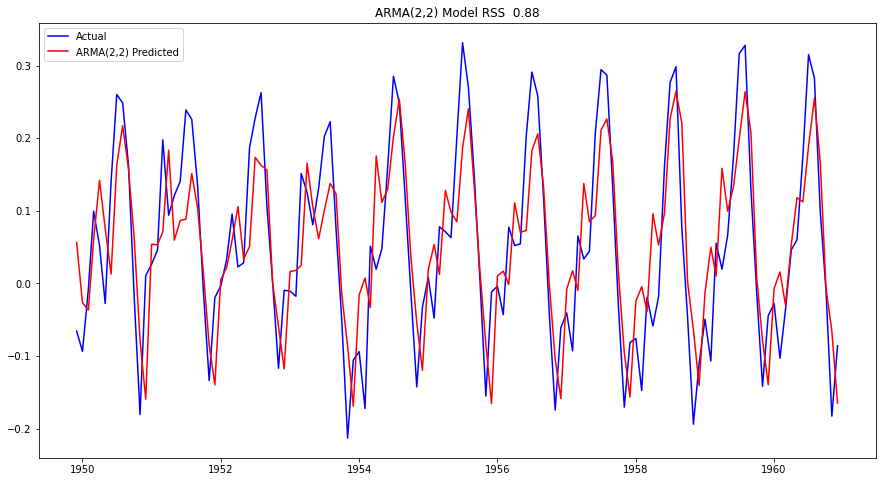

In [30]:
# ARMA model with p=2, q=2

modarma = ARMA(df_log_diff, (2,2))
modarma_res = modarma.fit()
plt.figure(figsize=(15,8))
plt.plot(df_log_diff, label='Actual', color='b')
plt.plot(modarma_res.fittedvalues, label='ARMA(2,2) Predicted', color='r')
plt.legend()
plt.title('ARMA(2,2) Model RSS  {:.2f}'.format(sum((modarma_res.fittedvalues-df_log_diff['# Passengers'])**2)))
plt.show()


In [31]:
modarma_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           # Passengers   No. Observations:                  133
Model:                     ARMA(2, 2)   Log Likelihood                 144.780
Method:                       css-mle   S.D. of innovations              0.081
Date:                Wed, 02 Dec 2020   AIC                           -277.560
Time:                        17:14:37   BIC                           -260.217
Sample:                    12-01-1949   HQIC                          -270.512
                         - 12-01-1960                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0563      0.005     10.621      0.000       0.046       0.067
ar.L1.# Passengers     1.4884      0.078     19.033      0.000       1.335       1.642
ar.L2.# Passengers    -0.7613      0.078     -9.776      0.000      -0.914      -0.609
ma.L1.# Passengers    -0.7231      0.142     -5.098      0.000      -1.001      -0.445
ma.L2.# Passengers    -0.0780      0.139     -0.563      0.574      -0.350       0.194
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9775           -0.5983j            1.1461           -0.0874
AR.2            0.9775           +0.5983j            1.1461            0.0874
MA.1            1.2219           +0.0000j            1.2219            0.0000
MA.2          -10.4968           +0.0000j           10.4968            0.5000
-----------------------------------------------------------------------------
"""

The ARMA model with p=2, q=2 is selected, based on lower AIC and BIC. The predictions and forecast below are based on this model.

In [32]:
# Predictions from ARMA(2,2) model
predicted2 = pd.Series(modarma_res.fittedvalues)
predicted2.head()

Year-Month
1949-12-01    0.056344
1950-01-01   -0.026575
1950-02-01   -0.036694
1950-03-01    0.061120
1950-04-01    0.142173
dtype: float64

In [33]:
# Add back moving average from linear regression model

X2 = np.asarray(pd.to_datetime(predicted2.index).map(datetime.toordinal)).reshape(-1,1)
ypred2 = lr.predict(X2) # predicted moving average

In [34]:
mvavgpred2 = pd.Series(ypred2, index=predicted2.index)
predlog2 = predicted2 + mvavgpred2

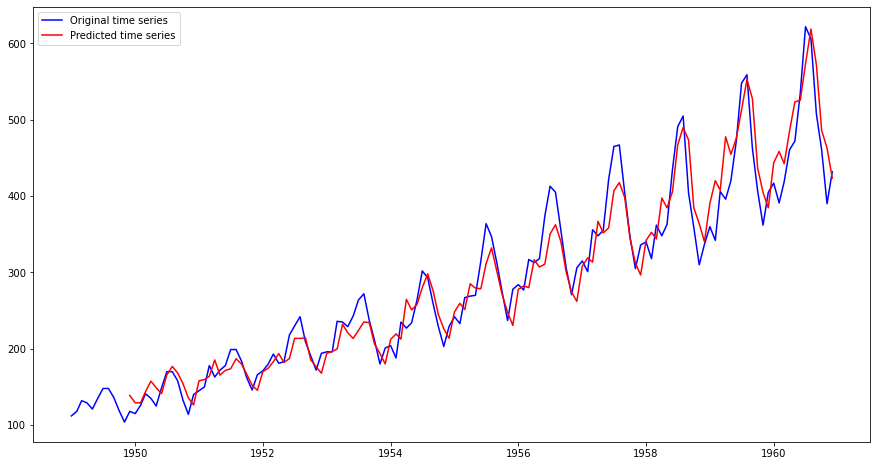

In [35]:
predseries2 = np.exp(predlog2) # predicted time series
# plot
plt.figure(figsize=(15,8))
plt.plot(df, label='Original time series', color='b')
plt.plot(predseries2, label='Predicted time series', color='r')
plt.legend()
plt.show()

In [36]:
# Forecast for next 24 months
forecastlg2 = modarma_res.forecast(steps=24)[0]

# Last date of prediction
pred2_lst = predseries2.index[predseries2.index.shape[0]-1]

In [37]:
# Generate date range for forecast
fc2dates = pd.date_range(start=pred2_lst, periods=24, freq='1M') + pd.offsets.MonthBegin(1)

In [38]:
# Add back moving average term to the forecast

# Predict moving average from linear regression model
Xf2 = np.array(fc2dates.map(datetime.toordinal)).reshape(-1,1)
yf2 = lr.predict(Xf2)

# Add back moving average
forecastlg2wavg = forecastlg2 + yf2

# Transform back from log
forecast2 = np.exp(forecastlg2wavg)  

# Make a Pandas series for the forecast
fcseries2 = pd.Series(forecast2, index=fc2dates)


In [39]:
# Forecasted time series
fcseries2

1961-01-01    493.988746
1961-02-01    532.189885
1961-03-01    566.127579
1961-04-01    588.997780
1961-05-01    597.064862
1961-06-01    593.140219
1961-07-01    582.590997
1961-08-01    571.979689
1961-09-01    565.644174
1961-10-01    565.585591
1961-11-01    572.203869
1961-12-01    583.542724
1962-01-01    597.512622
1962-02-01    611.313275
1962-03-01    622.286819
1962-04-01    630.678731
1962-05-01    635.817040
1962-06-01    639.123793
1962-07-01    641.538335
1962-08-01    644.735598
1962-09-01    649.322168
1962-10-01    655.354172
1962-11-01    663.049992
1962-12-01    671.433423
dtype: float64

In [40]:
# Combine the predicted and forecasted pandas series

predfc2 = pd.concat([predseries2, fcseries2], axis=0)
predfc2

1949-12-01    138.879375
1950-01-01    129.152702
1950-02-01    129.177294
1950-03-01    143.783813
1950-04-01    157.538852
                 ...    
1962-08-01    644.735598
1962-09-01    649.322168
1962-10-01    655.354172
1962-11-01    663.049992
1962-12-01    671.433423
Length: 157, dtype: float64

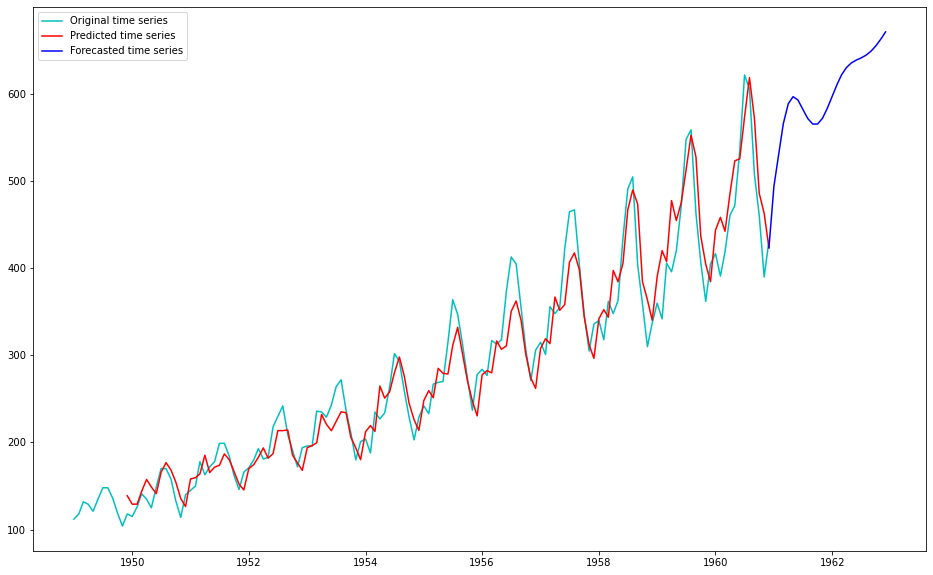

In [41]:
# Plot
plt.figure(figsize=(16,10))
plt.plot(df, label='Original time series', color='c')
plt.plot(predfc2.loc[:pred2_lst], label='Predicted time series', color='r')
plt.plot(predfc2.loc[pred2_lst:], label='Forecasted time series', color='b')
plt.legend()
plt.show()